In [ ]:
!pip install opencv-python-headless

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image


In [ ]:
import zipfile
import os

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/kidney_data')


In [ ]:
os.listdir('/content/kidney_data')


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

data_dir = '/content/kidney_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

train_ds = image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=123
)

In [ ]:
import os
import matplotlib.pyplot as plt
import random

def visualize_images(path, num_images=5):
    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)

    plt.tight_layout()
    plt.show()


In [ ]:
import os
os.listdir('/content/kidney_data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')


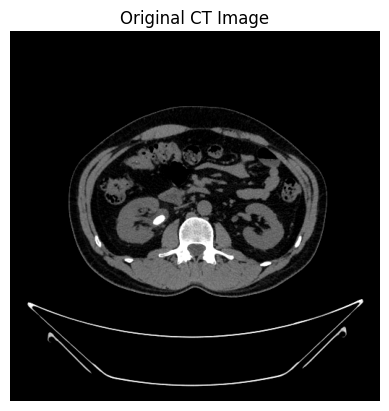

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Set image path

img_path = '/content/Stone8.jpg'

# Load image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Show original image
plt.imshow(img, cmap='gray')
plt.title("Original CT Image")
plt.axis('off')
plt.show()


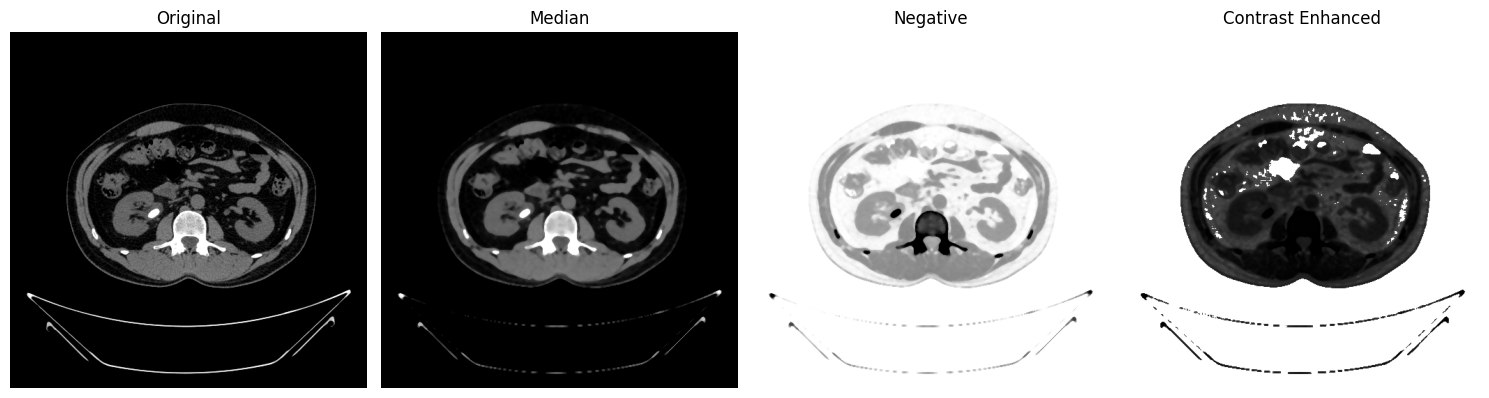

In [ ]:
#median filter
median= cv2.medianBlur(img, 5)

#negative filter
negative= 255 - median

#contrast enhancement using histogram equalization
contrast= cv2.equalizeHist(negative)

#display all
titles= ['Original', 'Median', 'Negative', 'Contrast Enhanced']
images= [img, median, negative, contrast]

plt.figure(figsize=(15,5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel, prewitt
from skimage.feature import canny
from skimage.measure import shannon_entropy
from skimage.io import imread
from skimage.transform import resize

def preprocess_image(image_path):
    #load and resize img
    img = imread(image_path)
    img = resize(img, (256, 256))
    img_gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    #median filter
    median = cv2.medianBlur(img_gray, 5)

    #negative transformation
    negative = 255 - median

    #histogram equalization
    contrast = cv2.equalizeHist(negative)

    return img_gray, contrast

def apply_all_filters(preprocessed_img):
    #apply all edge filters
    sobel_img = sobel(preprocessed_img)
    prewitt_img = prewitt(preprocessed_img)
    canny_img = canny(preprocessed_img, sigma=1)

    #calculate entropy
    entropy_sobel = shannon_entropy(sobel_img)
    entropy_prewitt = shannon_entropy(prewitt_img)
    entropy_canny = shannon_entropy(canny_img)

    return {
        'Sobel': (sobel_img, entropy_sobel),
        'Prewitt': (prewitt_img, entropy_prewitt),
        'Canny': (canny_img, entropy_canny)
    }

def show_results(original_gray, preprocessed, results):
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 5, 1)
    plt.imshow(original_gray, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(preprocessed, cmap='gray')
    plt.title('Preprocessed')
    plt.axis('off')

    for i, (filter_name, (edge_img, entropy_val)) in enumerate(results.items()):
        plt.subplot(1, 5, i+3)
        plt.imshow(edge_img, cmap='gray')
        plt.title(f'{filter_name}\nEntropy={entropy_val:.4f}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def full_pipeline(image_path):
    original_gray, preprocessed = preprocess_image(image_path)
    results = apply_all_filters(preprocessed)
    show_results(original_gray, preprocessed, results)


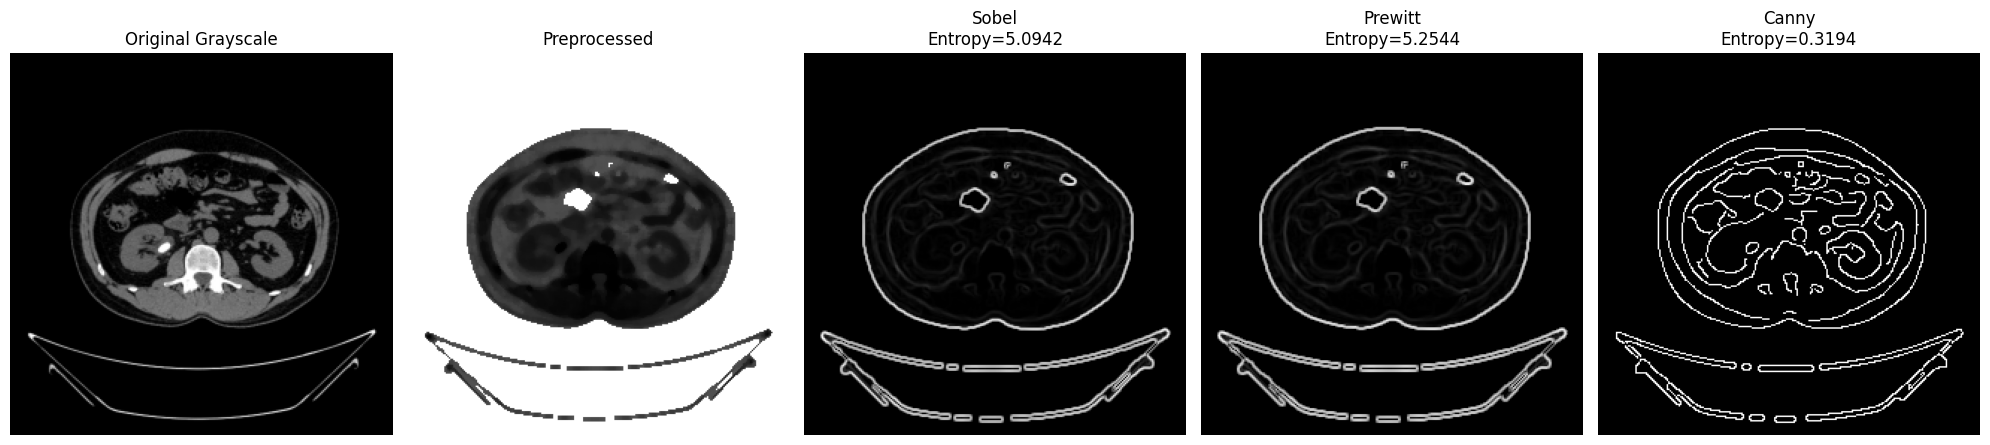

In [ ]:
image_path = '/content/Stone8.jpg'
full_pipeline(image_path)

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
ERROR: Ignored the following versions that require a different python version: 0.0.1 Requires-Python <4.0,>=3.12; 0.0.2 Requires-Python <4.0,>=3.12; 0.0.3 Requires-Python <4.0,>=3.12; 0.0.4 Requires-Python <4.0,>=3.12; 0.0.5 Requires-Python <4.0,>=3.12; 0.0.6 Requires-Python <4.0,>=3.12; 0.0.7 Requires-Python <4.0,>=3.12; 0.0.7.1 Requires-Python <4.0,>=3.12
ERROR: Could not find a version that satisfies the requirement model_inference (from versions: none)
ERROR: No matching distribution found for model_inference
Loading model..
Reading image..
Running inference..

0: 640x640 1 kidney_stone, 570.3ms
Speed: 4.7ms preprocess, 570.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Annotating image..


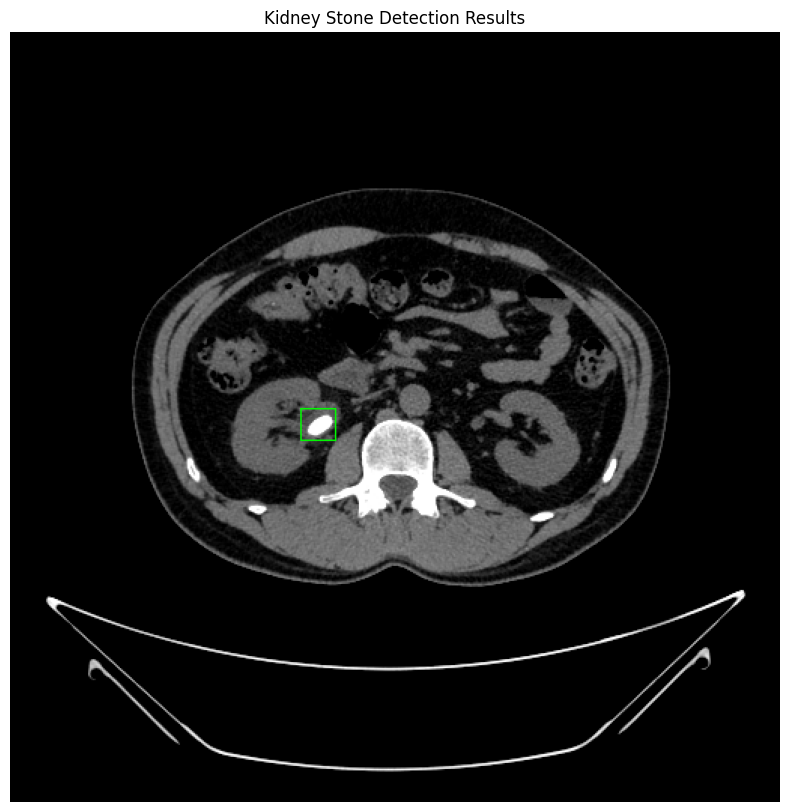

✅ Kidney stone is detected.


In [ ]:
!pip install streamlit
!pip install PIL
!pip install model_inference
!pip install ultralytics
!pip install opencv-python-headless
!pip install matplotlib

import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

class KidneyStoneDetectionModel:

    def __init__(self, model_path) -> None:
        self.model = YOLO(model=model_path)
        self.results = []

    def run_inference(self, image):
        self.results = self.model(image, conf=0.5)

    def annotate_image(self, image):
        annotated_image = image.copy()
        for result in self.results:
            boxes = result.boxes
            for box in boxes:
                coord = box.xyxy[0]
                x1, y1 = int(coord[0]), int(coord[1])
                x2, y2 = int(coord[2]), int(coord[3])
                cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 1)
        return annotated_image

def show_image(image, title="Image"):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


if __name__ == "__main__":
    model_path = "./ks_detection.pt"

    print("Loading model..")
    model = KidneyStoneDetectionModel(model_path=model_path)

    img_path = "/content/Stone8.jpg"

    # Read the image
    print("Reading image..")
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run inference
    print("Running inference..")
    model.run_inference(image=image)

    # Check if any boxes (kidney stone) were detected
    found_stone = False
    for result in model.results:
        if result.boxes and len(result.boxes) > 0:
            found_stone = True
            break

    # Annotate image
    print("Annotating image..")
    annotated_image = model.annotate_image(image=image)

    # Display image
    show_image(annotated_image, title="Kidney Stone Detection Results")

    # Print result
    if found_stone:
        print("✅ Kidney stone is detected.")
    else:
        print("❌ Kidney stone is NOT detected.")
